In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [133]:
#print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import re

import spacy
from nltk.tokenize import RegexpTokenizer
import nltk

In [3]:
df = pd.read_csv('./data/fomc_minutes_2019_2014.csv')

In [51]:
df.head()

minutes
0  \nMinutes of the Federal Open Market Committee...
1  \nMinutes of the Federal Open Market Committee...
2  \nMinutes of the Federal Open Market Committee...
3  \nMinutes of the Federal Open Market Committee...
4  \nMinutes of the Federal Open Market Committee...

In [52]:
df.shape

(84, 1)

# Data Cleaning

In [53]:
def html_to_words(raw_text):
    # Function to convert a document to a string of words
    
    # 1. Remove HTML.
    document = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", document)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english')) 
    extra = ['http','https','www','com','@','...','…']
    # 5. Remove stop words.
    meaningful_words = [word for word in words if not word in stops and word not in extra]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [54]:
# applies the html_to_words function on the minutes column
# and creates a new column with clean text

df['clean_text'] = df['minutes'].apply(html_to_words)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  
0  minutes federal open market committee january ...  
1  minutes federal open market committee march jo...  
2  minutes federal open market committee january ...  
3  minutes federal open market committee march jo...  
4  minutes federal open market committee may join...

In [ ]:
#df['clean_text'][0]

In [55]:
# import tokenizer and stemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize 

In [56]:
# define a function that takes in a text
# and tokenizes and stems each word
def stem_text(text):    
    stm = PorterStemmer()
    tokenized = word_tokenize(text)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes

    combined = ''
    for stemmed in stem_tokes:
        combined += stemmed + ' '
    return combined


In [57]:
# define a function that takes in a text
# and tokenizes and lemmatizes that text
def lem_text(text):    
    lem = WordNetLemmatizer()
    tokenizer = RegexpTokenizer('[A-Z]\w+')
    tokenized = tokenizer.tokenize(text)
    lemmed_tokes = []
    for toke in tokenized:
        lemmed_tokes.append(lem.lemmatize(toke))
    lemmed_tokes

    combined = ''
    for lemmed in lemmed_tokes:
        combined += lemmed + ' '
    return combined

In [ ]:
#lem_text(df['minutes'][0])

In [ ]:
#stem_text(df['minutes'][0])

In [58]:
df['stemmed_text'] = df['minutes'].apply(stem_text)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  \
0  minutes federal open market committee january ...   
1  minutes federal open market committee march jo...   
2  minutes federal open market committee january ...   
3  minutes federal open market committee march jo...   
4  minutes federal open market committee may join...   

                                        stemmed_text  
0  minut of the feder open market committe januar...  
1  minut of the feder open market committe march ...  
2  minut of the feder open market committe januar...  
3  minut of the feder open market committe march ...  
4  minut of the feder open market committe may 1-...

In [59]:
df['lemmed_text'] = df['minutes'].apply(lem_text)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  \
0  minutes federal open market committee january ...   
1  minutes federal open market committee march jo...   
2  minutes federal open market committee january ...   
3  minutes federal open market committee march jo...   
4  minutes federal open market committee may join...   

                                        stemmed_text  \
0  minut of the feder open market committe januar...   
1  minut of the feder open market committe march ...   
2  minut of the feder open market committe januar...   
3  minut of the feder open market committe march ...   
4  minut of the feder open market committe may 1-...   

                                         lemmed_text  
0  Minutes Federal Open Market Committee January ...  
1  Minutes Federal Open Market Committee March Fe...  
2  Minutes Federal Open Market Committee January ...  
3  Minutes Federal Open Market Committee March Fe...  
4  Minutes Federal Open Market Committee May Fede...

# Extract Nouns from each Document

In [60]:
nlp = spacy.load('en')

In [61]:
# define a function to extract a text's nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_NOUN(text):
    document = nlp(text)
    NOUNS = []
    for token in document:
        if token.pos_ == 'NOUN':
            NOUNS.append(str(token))   
    #print(NOUNS)
    combined = ''
    for token in NOUNS:
        combined += token + ' '
    return combined

In [62]:
extract_NOUN(df['lemmed_text'][0])

'Economist Market Economist Market Account Market DOMESTIC MARKET OPERATIONS MARKET TRANSACTIONS Market Account SECURITIES LENDING Securities OPERATIONAL READINESS TRANSACTIONS ACCOUNTS Securities AUTHORIZATION CURRENCY OPERATIONS Settlements TRANSACTIONS DOLLAR OPERATIONS Market Market CURRENCY Inflation Markets Market Operations Market Account Market SOFR Participants AFEs Investor EMEs SLOOS Growth Banks SLOOS GDP GDP GDP GDP GDP GDP Risks Districts Participants Estimates Districts Participants Market Return '

In [63]:
df['nouns_from_lemmed'] = df['lemmed_text'].apply(extract_NOUN)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  \
0  minutes federal open market committee january ...   
1  minutes federal open market committee march jo...   
2  minutes federal open market committee january ...   
3  minutes federal open market committee march jo...   
4  minutes federal open market committee may join...   

                                        stemmed_text  \
0  minut of the feder open market committe januar...   
1  minut of the feder open market committe march ...   
2  minut of the feder open market committe januar...   
3  minut of the feder open market committe march ...   
4  minut of the feder open market committe may 1-...   

                                         lemmed_text  \
0  Minutes Federal Open Market Committee January ...   
1  Minutes Federal Open Market Committee March Fe...   
2  Minutes Federal Open Market Committee January ...   
3  Minutes Federal Open Market Committee March Fe...   
4  Minutes Federal Open Market Committee May Fede...   

                                   nouns_from_lemmed  
0  Economist Market Economist Market Account Mark...  
1  Economist Market Market Account BALANCE NORMAL...  
2  Economist Market Economist Market Account Mark...  
3  Economist Market Markets Market Operations Mar...  
4  Economist Markets Market Operations Market Acc...

In [ ]:
#extract_NOUN(df['stemmed_text'][0])

In [64]:
df['nouns_from_stemmed'] = df['stemmed_text'].apply(extract_NOUN)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  \
0  minutes federal open market committee january ...   
1  minutes federal open market committee march jo...   
2  minutes federal open market committee january ...   
3  minutes federal open market committee march jo...   
4  minutes federal open market committee may join...   

                                        stemmed_text  \
0  minut of the feder open market committe januar...   
1  minut of the feder open market committe march ...   
2  minut of the feder open market committe januar...   
3  minut of the feder open market committe march ...   
4  minut of the feder open market committe may 1-...   

                                         lemmed_text  \
0  Minutes Federal Open Market Committee January ...   
1  Minutes Federal Open Market Committee March Fe...   
2  Minutes Federal Open Market Committee January ...   
3  Minutes Federal Open Market Committee March Fe...   
4  Minutes Federal Open Market Committee May Fede...   

                                   nouns_from_lemmed  \
0  Economist Market Economist Market Account Mark...   
1  Economist Market Market Account BALANCE NORMAL...   
2  Economist Market Economist Market Account Mark...   
3  Economist Market Markets Market Operations Mar...   
4  Economist Markets Market Operations Market Acc...   

                                  nouns_from_stemmed  
0  minut feder market committe januari meet feder...  
1  minut feder market committe march meet feder m...  
2  minut feder market committe januari meet feder...  
3  minut feder market committe march meet feder m...  
4  minut feder market committe meet feder market ...

In [67]:
# define a function to extract a text's proper nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_PROPN(text):
    document = nlp(text)
    PROPN = []
    for token in document:
        if token.pos_ == 'PROPN':
            PROPN.append(str(token))   
    #print(PROPN)
    combined = ''
    for token in PROPN:
        combined += token + ' '
    return combined

In [ ]:
#extract_PROPN(df['lemmed_text'][0])

In [70]:
df['pnouns_from_lemmed'] = df['lemmed_text'].apply(extract_NOUN)
df.head()

minutes  \
0  \nMinutes of the Federal Open Market Committee...   
1  \nMinutes of the Federal Open Market Committee...   
2  \nMinutes of the Federal Open Market Committee...   
3  \nMinutes of the Federal Open Market Committee...   
4  \nMinutes of the Federal Open Market Committee...   

                                          clean_text  \
0  minutes federal open market committee january ...   
1  minutes federal open market committee march jo...   
2  minutes federal open market committee january ...   
3  minutes federal open market committee march jo...   
4  minutes federal open market committee may join...   

                                        stemmed_text  \
0  minut of the feder open market committe januar...   
1  minut of the feder open market committe march ...   
2  minut of the feder open market committe januar...   
3  minut of the feder open market committe march ...   
4  minut of the feder open market committe may 1-...   

                                         lemmed_text  \
0  Minutes Federal Open Market Committee January ...   
1  Minutes Federal Open Market Committee March Fe...   
2  Minutes Federal Open Market Committee January ...   
3  Minutes Federal Open Market Committee March Fe...   
4  Minutes Federal Open Market Committee May Fede...   

                                   nouns_from_lemmed  \
0  Economist Market Economist Market Account Mark...   
1  Economist Market Market Account BALANCE NORMAL...   
2  Economist Market Economist Market Account Mark...   
3  Economist Market Markets Market Operations Mar...   
4  Economist Markets Market Operations Market Acc...   

                                  nouns_from_stemmed  \
0  minut feder market committe januari meet feder...   
1  minut feder market committe march meet feder m...   
2  minut feder market committe januari meet feder...   
3  minut feder market committe march meet feder m...   
4  minut feder market committe meet feder market ...   

                                  pnouns_from_lemmed  
0  Economist Market Economist Market Account Mark...  
1  Economist Market Market Account BALANCE NORMAL...  
2  Economist Market Economist Market Account Mark...  
3  Economist Market Markets Market Operations Mar...  
4  Economist Markets Market Operations Market Acc...

# Visualizations

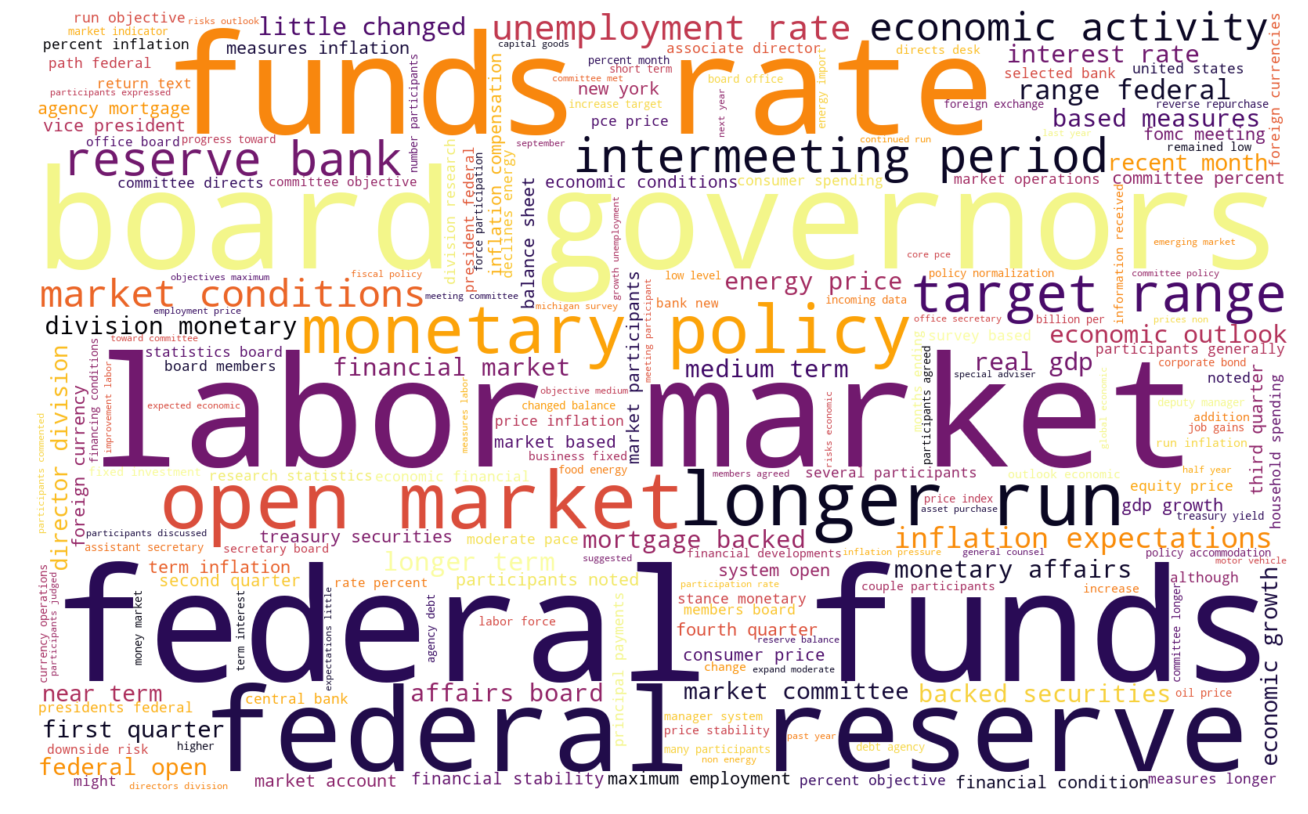

In [136]:
# returns a word cloud of cleaned FOMC Minutes 
clean_string = []
# iterates over values assigned to notify_nyc
for i in df['clean_text']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

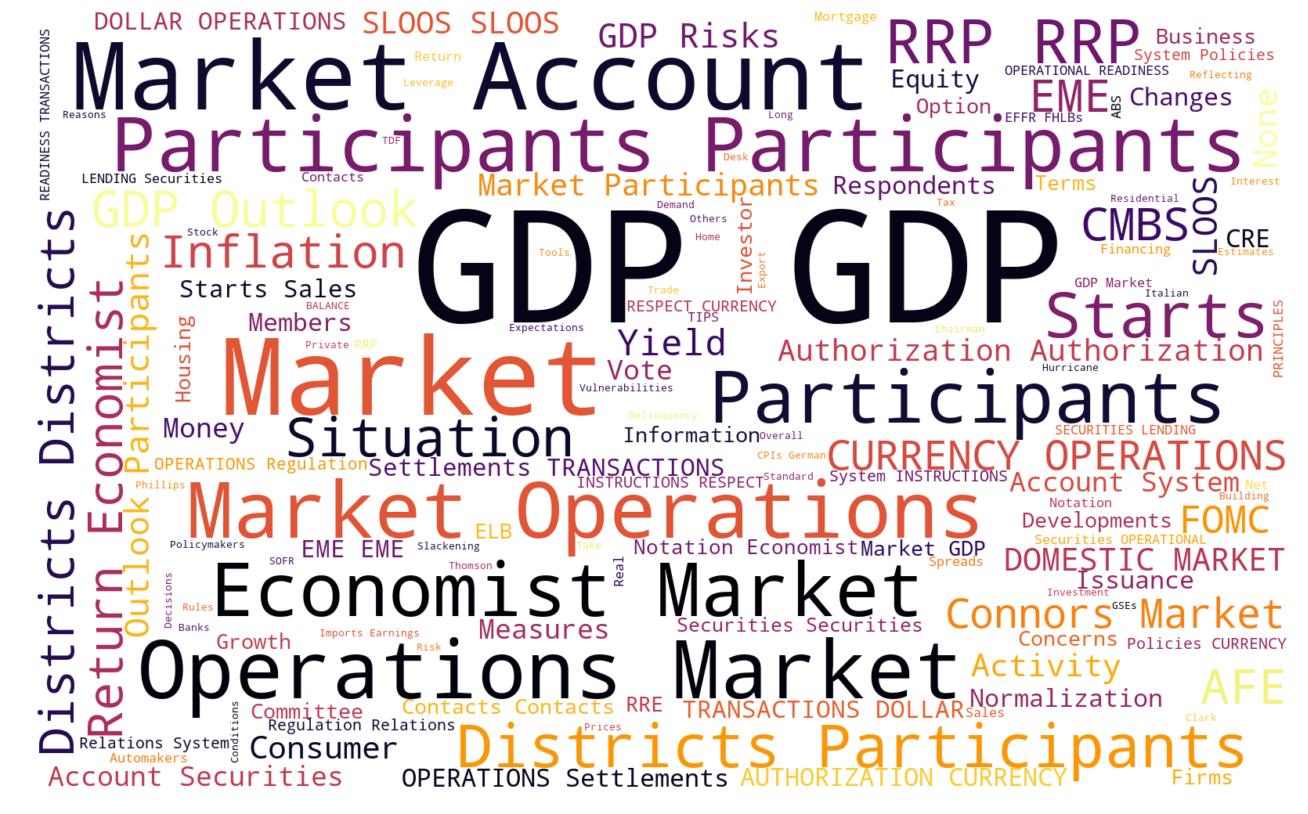

In [137]:
# returns a word cloud of Nouns from Lemmatized text 
clean_string = []
# iterates over values assigned to notify_nyc
for i in df['nouns_from_lemmed']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

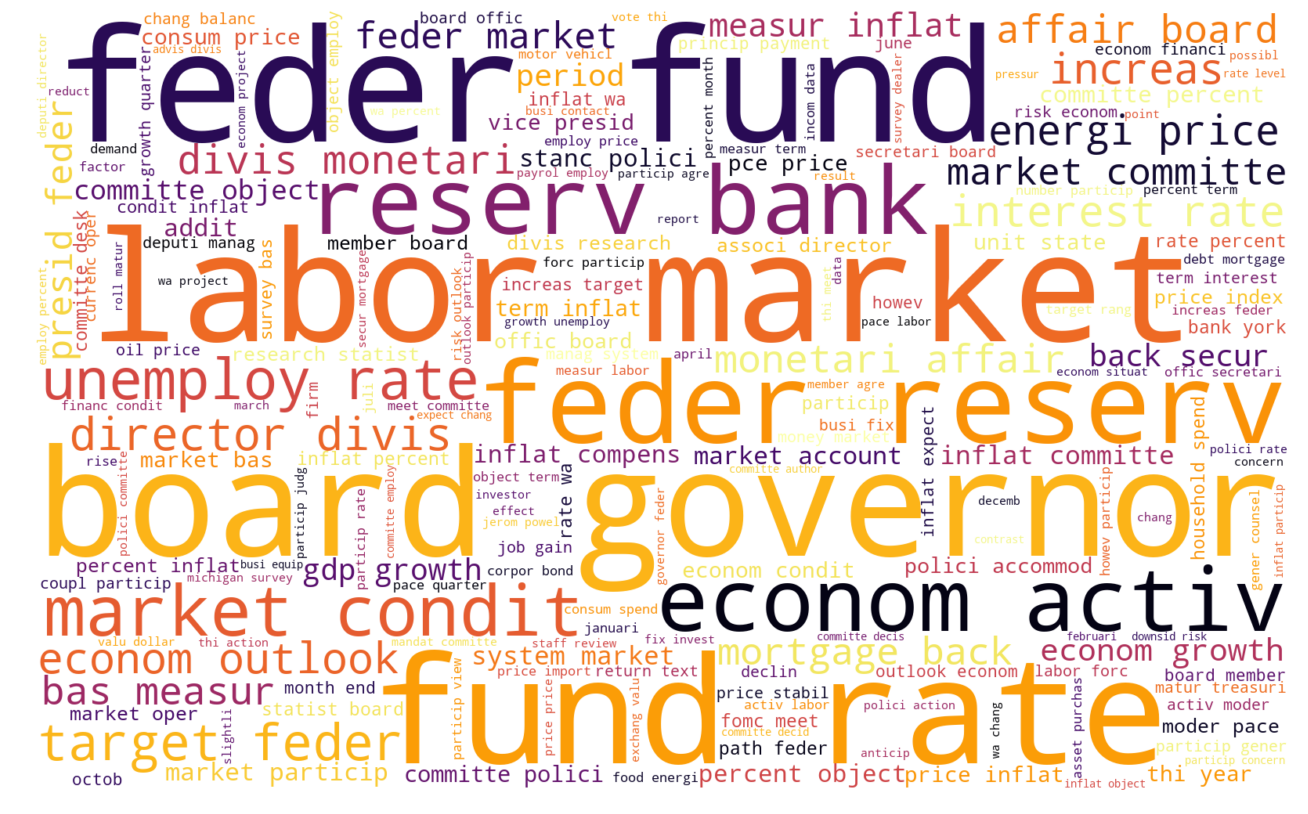

In [138]:
# returns a word cloud of Nouns from Stemmed text 
clean_string = []
# iterates over values assigned to notify_nyc
for i in df['nouns_from_stemmed']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

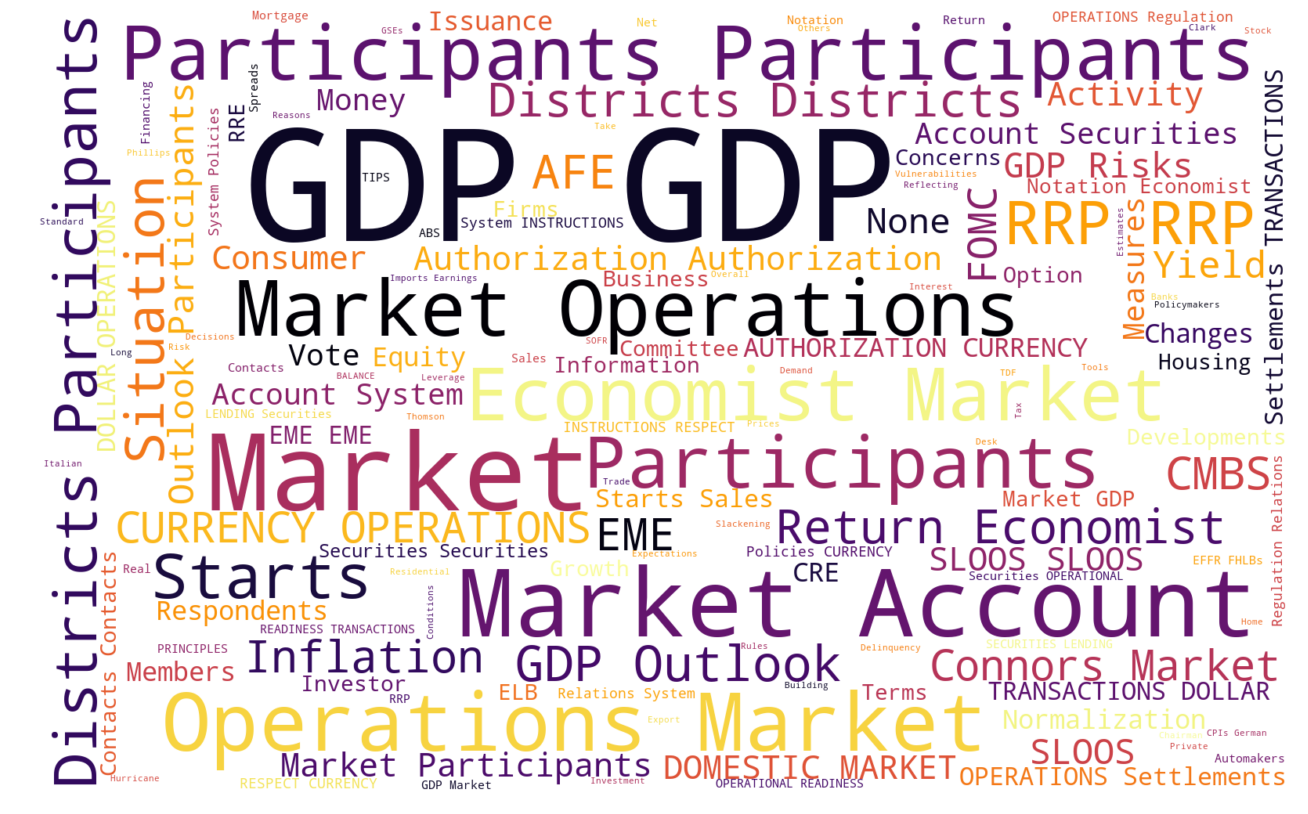

In [139]:
# returns a word cloud of Proper Nouns from Lemmatized text 
clean_string = []
# iterates over values assigned to notify_nyc
for i in df['pnouns_from_lemmed']:
    clean_string.append(i)
clean_string = pd.Series(clean_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(clean_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
# Extracting words from each document

# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Texts
dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df['minutes']]

# Initialize master list to populate
master_text_tokens = []

# For each dirty text, get list of clean tokens and append to master_text_tokens
for text in dirty_text_tokens:
    # Create template for clean tokens to populate for this particular text
    clean_text_tokens = []
    # For each word/token in each document, make sure it is not a stopword 
    # or URL piece or main search term 
    for word in text:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…'])):
            # Now extract it into clean token list
            clean_text_tokens.append(word)
    # Append this list of tokens to the master list
    master_text_tokens.append(clean_text_tokens)

In [85]:
len(master_text_tokens)

84

In [81]:
# "de-lists" a list of lists. 
# That is, turns a list of lists into a single list
full_list = master_text_tokens[0]
for sub_list in master_text_tokens[1:]:
    full_list.extend(sub_list)

In [82]:
full_list[0]

'minutes'

In [84]:
len(full_list)

471892

In [86]:
fdist = nltk.FreqDist(full_list)

In [87]:
fdist.most_common(10)

[('committee', 6778),
 ('inflation', 6644),
 ('market', 5888),
 ('rate', 5328),
 ('federal', 5200),
 ('participants', 4588),
 ('economic', 4390),
 ('policy', 3814),
 ('would', 3192),
 ('labor', 2968)]

In [89]:
common = fdist.most_common(20)

In [90]:
word_freq = []
for word, freq in common:
    #print(word)
    common_words = {}
    common_words['words'] = word
    common_words['freq'] = freq
    word_freq.append(common_words)

In [92]:
common_words = pd.DataFrame(word_freq)
common_words.head()

freq      words
0  6778  committee
1  6644  inflation
2  5888     market
3  5328       rate
4  5200    federal

In [117]:
# Extracting words from each document
def extractor(data):
    # Instantiate Tokenizer
    tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

    # Tokenizer Texts
    dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in data]

    # Initialize master list to populate
    master_text_tokens = []

    # For each dirty text, get list of clean tokens and append to master_text_tokens
    for text in dirty_text_tokens:
        # Create template for clean tokens to populate for this particular text
        clean_text_tokens = []
        # For each word/token in each document, make sure it is not a stopword 
        # or URL piece or main search term 
        for word in text:
            if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…'])):
                # Now extract it into clean token list
                clean_text_tokens.append(word)
        # Append this list of tokens to the master list
        master_text_tokens.append(clean_text_tokens)
        
    return master_text_tokens 




In [118]:
nouns_list = extractor(df['nouns_from_lemmed'])

In [119]:
nouns_full_list = nouns_list[0]

for s_list in nouns[1:]:
    nouns_full_list.extend(s_list)

In [120]:
nouns_full_list[0]

'economist'

In [122]:
len(nouns_full_list)

2484

In [123]:
fdist_n = nltk.FreqDist(nouns_full_list)

In [124]:
common_nouns = fdist_n.most_common(20)

In [125]:
word_freq = []
for word, freq in common_nouns:
    #print(word)
    noun_common_words = {}
    noun_common_words['words'] = word
    noun_common_words['freq'] = freq
    word_freq.append(noun_common_words)

In [126]:
common_words_nouns = pd.DataFrame(word_freq)
common_words_nouns.head()

freq         words
0   488           gdp
1   394        market
2   228  participants
3    94       account
4    90    operations

In [127]:
def plotter(x, y, part_of_speech):
    plt.figure(figsize=(10, 7))
    sns.barplot(x,
                y,  
                orient='h', color='b')
    plt.title(f'20 Most Common Words ({part_of_speech})', fontsize=18, )
    plt.xlabel('Frequency', fontsize=16)
    plt.ylabel('Words', fontsize=16);

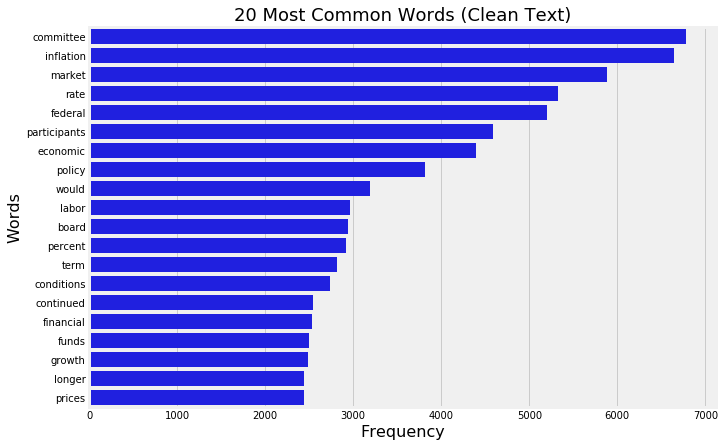

In [140]:
plotter(common_words['freq'],
        common_words['words'],
       'Clean Text')

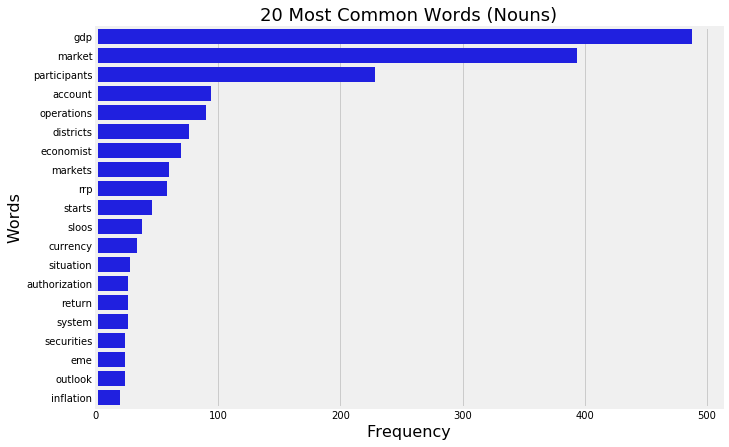

In [141]:
plotter(common_words_nouns['freq'], common_words_nouns['words'], 'Nouns')